In [1]:
from scipy.stats import skew
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import power_transform

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
dfc=df

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.loc[df['sales']=='']#checkling columns for blank spaces

,TV,radio,newspaper,sales


In [8]:
df.newspaper.unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [51]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#performing Visualization techniques

#distplot and visualize the skewness

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

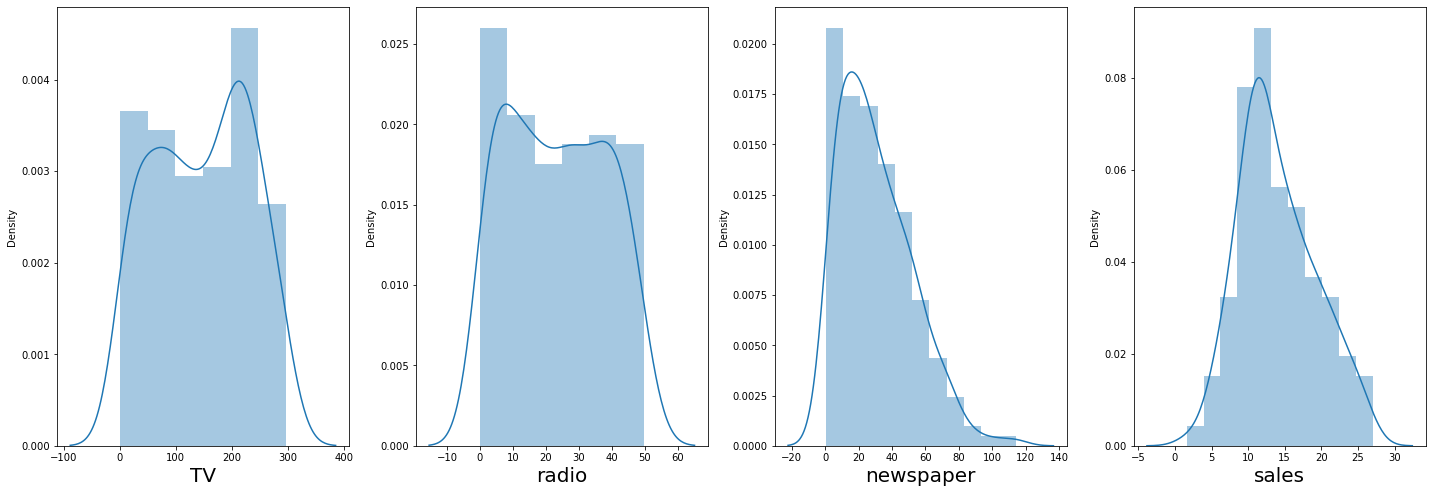

In [10]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [11]:
#we have observed some skewness in all the data,
#the tv column is showing the highest value in somewhere between 200-300 and the data has some skewness towards the left side
#radio column is also showing some thing similar kind of approach butb in the rightside as its skewness is somewhere stats from 30and going towards the right side
# for news paper it shows skewness in rightside bt the skewness is really much small
#and for the sales it is somewhat normally distributed we can as per visualization.

#scatterplot and visualize

In [12]:
Y=df['sales']
X=df.drop(columns = ['sales'])

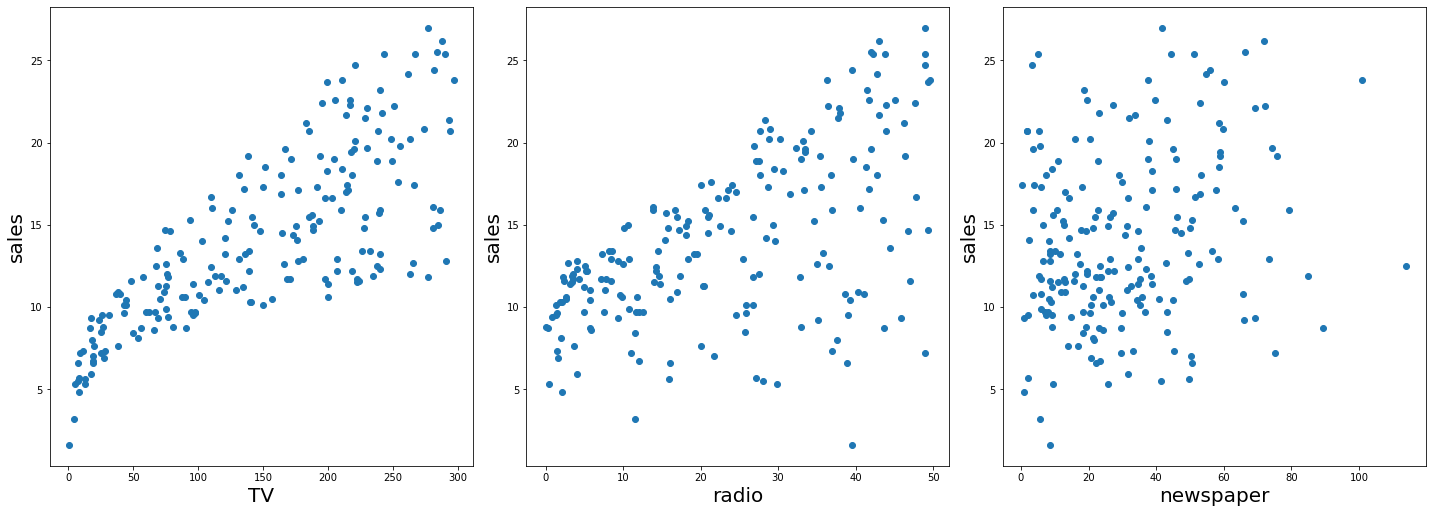

In [13]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=4:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [14]:
#we can see in the figure thAT tv has very good positive relationship with sales,which means increase in tv add increases sales.
#we can see in  thAT radio has  moderate but  positive relationship with sales,which means increase in radio add  somewhat increases sales.
#but here in the third graph we can see a pritty much scattered diagram which have no trend showing which we can say that could no or negligible relation ship with sales.
#with which we can say from this graph tv has the most ,radio with moderate and newspaper with least effect on sales.
# but this doesn't conclude , let's see ahead

#Correlation

In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

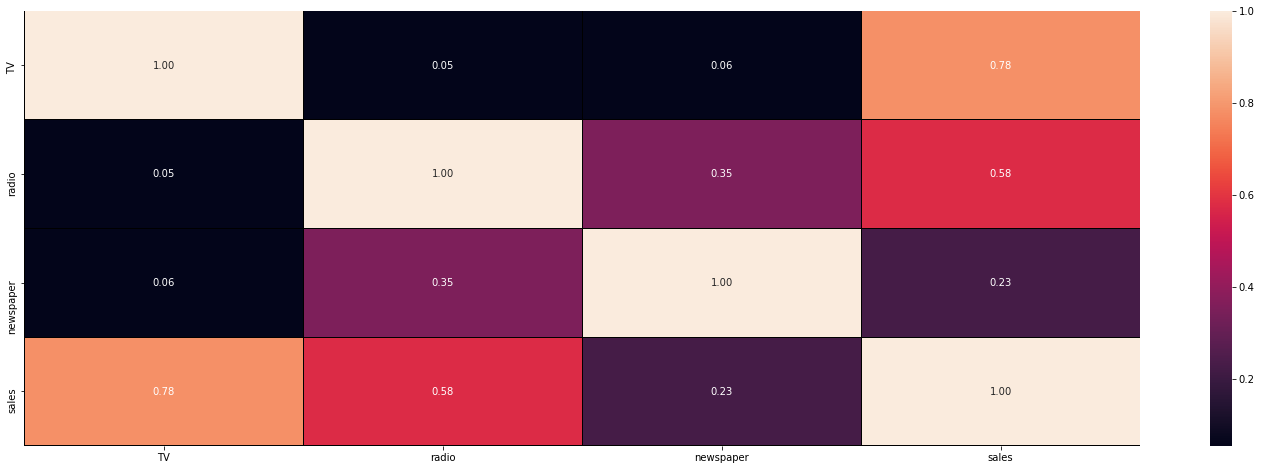

In [16]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

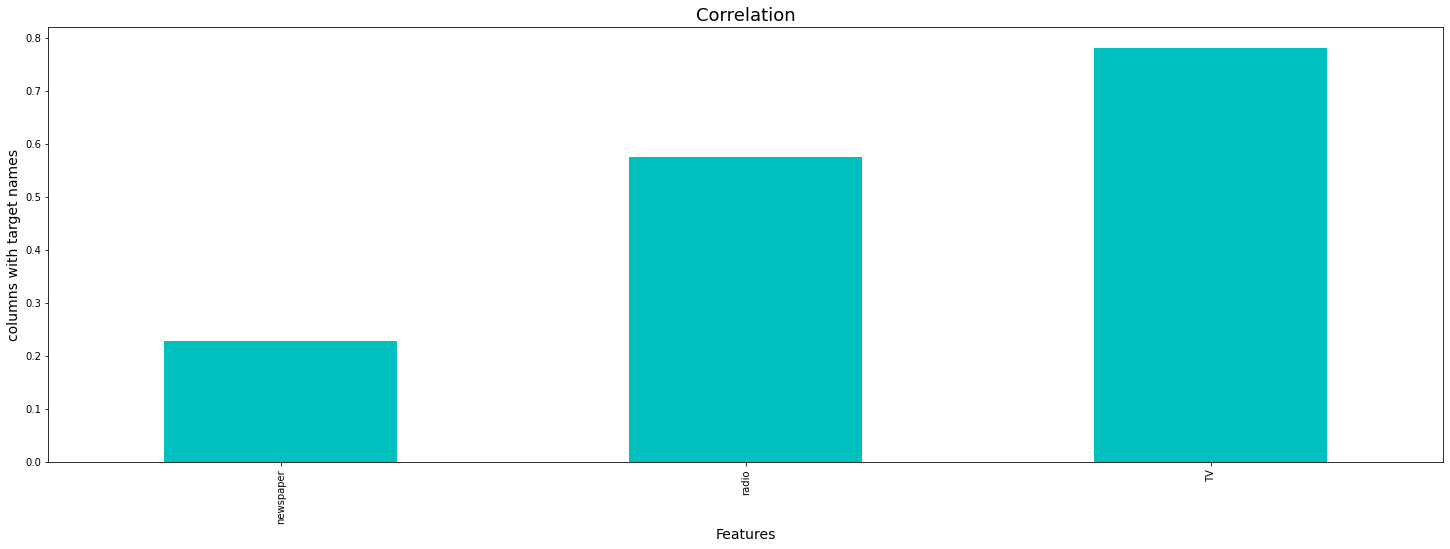

In [17]:
plt.figure(figsize=(25,8))
df.corr()['sales'].sort_values(ascending=True).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [18]:
#as we can see from the above correlation plots that it also indicate the same like scatter plot.
#we can see:-i)we can see the best correlation of sales is  with tv and then radio and the least with newspaper.
#so from here also we get to know that total sales is largely dependent on tv and radio.

In [19]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
df.loc[df['sales']==0]#we have tested all columns with 0  

,TV,radio,newspaper,sales


In [21]:
df.sort_values(by="sales", ascending=True)

,TV,radio,newspaper,sales
130,0.7,39.6,8.7,1.6
155,4.1,11.6,5.7,3.2
8,8.6,2.1,1.0,4.8
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
...,...,...,...,...
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
198,283.6,42.0,66.2,25.5
183,287.6,43.0,71.8,26.2


In [22]:
#we can see tv hasthe lowest which creates suspicion for out liers

In [23]:
df.sort_values(by="sales", ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [24]:
#we can see that the descending order shows that tv outstanding sales with radio moderate and newspaper miniumum ,this shows
#the same result as per the above scatter and corr plot.

In [25]:
df.skew().sort_values()

TV          -0.069853
radio        0.094175
sales        0.407571
newspaper    0.894720
dtype: float64

In [26]:
#we can see that newspaper has very much skewness and i think sales also has skewness because of newspaper

In [27]:
df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)

In [28]:
df.skew().sort_values()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
sales       -0.007841
dtype: float64

In [29]:
#as wew can see that it doesn't show a value which is beleivable.
#so we can drop the skewness plan and be there with original data.

In [30]:
df=dfc

In [31]:
df=df.drop(columns=['Unnamed: 0'])

In [32]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


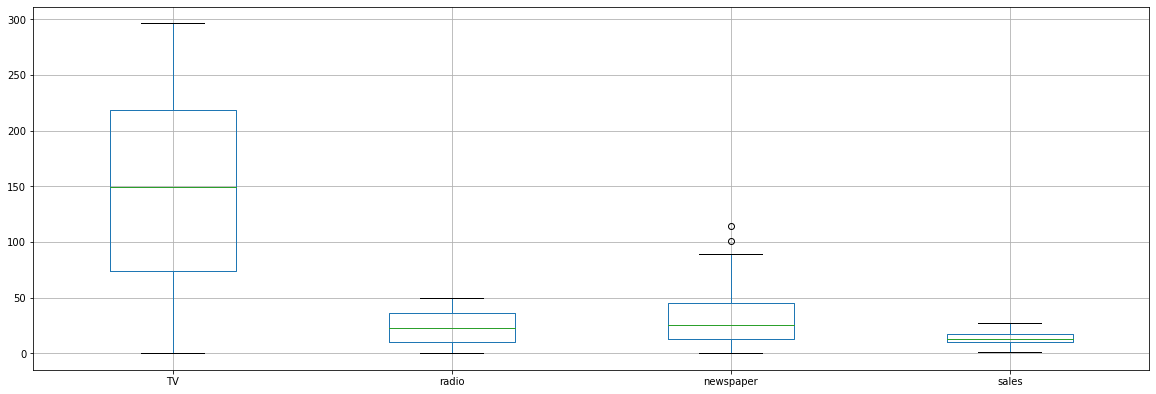

In [33]:
df.iloc[:,0:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [34]:
#we dont need to use any outlier technics as there are no or minimal outlier as we can see and conclude that newspaper have outlier
#but it can be neglected

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [36]:
#so as we tghat there is minimal data we found as outlier it concludes above boxplot. 

In [37]:
X,Y

(        TV  radio  newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: sales, Length: 200, dtype: float64)

In [38]:
df['sales'].sum()

2804.5

In [39]:
df['newspaper'].sum()

6110.799999999999

In [70]:
#modelbuilding

In [40]:
lr=LinearRegression()
for i in range(0,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.9005511298841222
At random state0,the testing  accuracy is :- 0.8876696235952206


At random state1,the training accuracy is :- 0.8823087520268538
At random state1,the testing  accuracy is :- 0.9143968806980323


At random state2,the training accuracy is :- 0.9338052592106413
At random state2,the testing  accuracy is :- 0.8192293657633273


At random state3,the training accuracy is :- 0.9156507052396787
At random state3,the testing  accuracy is :- 0.8644367595135474


At random state4,the training accuracy is :- 0.8947481621729059
At random state4,the testing  accuracy is :- 0.897706293247054


At random state5,the training accuracy is :- 0.8921060251820042
At random state5,the testing  accuracy is :- 0.9059645424322227


At random state6,the training accuracy is :- 0.8996922646873831
At random state6,the testing  accuracy is :- 0.889511375426107


At random state7,the training accuracy is :- 0.895318623984293
At random state7,the testing 

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=21)

In [42]:
lr.fit(X_train,Y_train)

LinearRegression()

In [43]:
pred_test=lr.predict(X_test)

In [44]:
print(r2_score(Y_test,pred_test))

0.8825691306673278


In [45]:
#we can see that the accuracy is same as the random state.

In [46]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.8908473589845056 and accuracy score for training is -1.0430189867616995 and accuracy score for testing is 0.8825691306673278


At cross fold 3 the cv score is 0.8916464591145559 and accuracy score for training is -1.0430189867616995 and accuracy score for testing is 0.8825691306673278


At cross fold 4 the cv score is 0.8900070660549507 and accuracy score for training is -1.0430189867616995 and accuracy score for testing is 0.8825691306673278


At cross fold 5 the cv score is 0.8871063495438436 and accuracy score for training is -1.0430189867616995 and accuracy score for testing is 0.8825691306673278


At cross fold 6 the cv score is 0.8899208882186672 and accuracy score for training is -1.0430189867616995 and accuracy score for testing is 0.8825691306673278


At cross fold 7 the cv score is 0.8859930219823539 and accuracy score for training is -1.0430189867616995 and accuracy score for testing is 0.8825691306673278


At cross fold 8 the cv score is 0.

In [47]:
#as the cv score doesnt impact much to theaccuracy we are taking cv =4

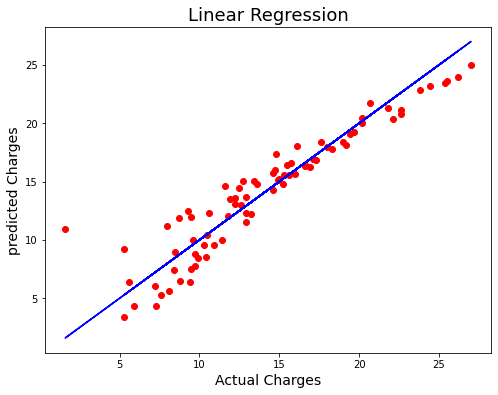

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(x=Y_test,y=pred_test,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()


In [49]:
#we can see the predicted data is similar to actual which we can obseve in the above graph,all the data mostly are under the perfect fit line.


In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest( f_regression,k=2).fit_transform(X, Y)
X_new


array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [ 67.8,  36.6],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206

In [69]:
#we can see that tv and radio are found better than newspaper in terms of generating sales.

In [50]:
#regularization

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'selection':['cyclic', 'random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)




{'alpha': 0.1, 'random_state': 7, 'selection': 'random'}


In [86]:
ls=Lasso(alpha=0.1,random_state=7,selection='random')
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.8829162016321876

In [87]:
cv_score=cross_val_score(ls,X,Y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.8900884223976854

In [85]:
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rs=Ridge()
clf=GridSearchCV(rs,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 4, 'solver': 'sag'}


In [88]:
rs=Ridge(alpha=10,random_state=4,solver='sag')
rs.fit(X_train,Y_train)
rs.score(X_train,Y_train)
pred_rs=rs.predict(X_test)
rss=r2_score(Y_test,pred_ls)
rss

0.8829162016321876

In [89]:
cv_score=cross_val_score(rs,X,Y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.8898595675093226

In [115]:
# our model is giving good accuracy from regularization but the r2 score and cv_mean is having not much difference after all this regularization.

In [54]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [93]:
#ensemble techniques

In [91]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [101]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,X,Y,cv=4)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: 90.89881452244069
cross_val_score: 91.48972813438772


In [94]:
#knn model

In [97]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 3}


In [102]:
kn= KNeighborsRegressor(n_neighbors=3,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,X,Y,cv=4)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: 91.69462597816312
cross_val_score: 91.8569564025135


In [100]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,10))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 3, 'random_state': 6}


In [103]:
bg=BaggingRegressor(max_features=3,random_state=6)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,X,Y,cv=4)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: 97.1729833796203
cross_val_score: 96.95188462185104


In [ ]:
##we are getting model accuracy or we can say r2score and cross val score approximately 90 for every model but as we know bagging gives a good score
#which is boosting it to 97which is very good.

In [110]:
r2_score= {
    'model':['linear regression', 'random forest','KNeighborsRegressor','bagging'],
    'R2score':[88.29162016321876, 90.89881452244069,91.69462597816312, 97.1729833796203 ]
}
r2_Score=pd.DataFrame(data=r2_score)
r2_Score.sort_values(by=['R2score'], ascending=True)

,model,R2score
0,linear regression,88.291620
1,random forest,90.898815
2,KNeighborsRegressor,91.694626
3,bagging,97.172983


In [ ]:
#we can see that bagging is giving the best result but bagging always show the result with sum boost,and knn is costlier and time consuming,
#so we can say that random forest is gonna give us the disered model

In [111]:
filename='advertising dt.pkl'
pickle.dump(rf,open(filename,'wb'))


In [112]:
loaded_model=pickle.load(open('advertising dt.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.9089881452244069


In [113]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predicted,11.104,12.109,21.384,18.973,14.412,10.713,21.192,7.777,9.944,22.456,...,11.52,21.452,14.609,12.191,15.299,13.4,20.942,9.432,9.627,9.649
Original,11.110,11.660,23.190,19.000,16.090,10.960,21.280,7.730,9.650,24.560,...,10.98,22.130,12.050,12.060,15.860,13.5,21.740,9.830,9.380,8.920


In [116]:
#so here we can say that the data is not showing so much difference and with this we conclude this model.